# Notebook 0: Carga, exploración y procesamiento del dataset MovieLens 1M

Objetivos:
- Cargar `ratings.dat`, `users.dat`, `movies.dat`
- Hacer un análisis exploratorio básico (estadísticas y visualizaciones)
- Generar y guardar las versiones procesadas en CSV en `data/processed/` para los notebooks siguientes

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set(style="whitegrid")
%matplotlib inline

# Definir rutas de los datos
Comprobamos que los archivos `.dat` están en `../data/`.

In [ ]:
raw_path = Path("../data")
print("Contenido de ../data/:")
for p in sorted(raw_path.iterdir()):
    print("-", p.name)

Contenido de ../data/:
- movies.dat
- ratings.dat
- README
- users.dat


# Cargar los archivos `.dat` (MovieLens 1M)
Formato:
- ratings.dat: UserID::MovieID::Rating::Timestamp
- users.dat:   UserID::Gender::Age::Occupation::Zip-code
- movies.dat:  MovieID::Title::Genres

In [ ]:
ratings = pd.read_csv(
    raw_path / "ratings.dat",
    sep="::",
    engine="python",
    header=None,
    names=["userId", "movieId", "rating", "timestamp"],
    encoding="latin1",
)

users = pd.read_csv(
    raw_path / "users.dat",
    sep="::",
    engine="python",
    header=None,
    names=["userId", "gender", "age", "occupation", "zip"],
    encoding="latin1"
)

movies = pd.read_csv(
    raw_path / "movies.dat",
    sep="::",
    engine="python",
    header=None,
    names=["movieId", "title", "genres"],
    encoding="latin1",
)

print("Cargados:")
print(" - ratings:", ratings.shape)
print(" - users:  ", users.shape)
print(" - movies: ", movies.shape)

Cargados:
 - ratings: (1000209, 4)
 - users:   (6040, 5)
 - movies:  (3883, 3)


# Primeras filas (verificación rápida)

In [ ]:
display(ratings.head())
display(users.head())
display(movies.head())

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,userId,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


# Estadísticas descriptivas básicas
- Cantidad de filas/columnas
- Media, mediana, desviación de ratings
- Usuarios e ítems únicos

In [ ]:
print("Ratings — resumen:")
display(ratings['rating'].describe())

print("\nUsuarios únicos:", ratings['userId'].nunique())
print("Películas únicas:", ratings['movieId'].nunique())
print("Total de valoraciones:", len(ratings))

Ratings — resumen:


count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


Usuarios únicos: 6040
Películas únicas: 3706
Total de valoraciones: 1000209


# Visualizaciones básicas
- Distribución de ratings
- Distribución de edades
- Histograma de número de ratings por película

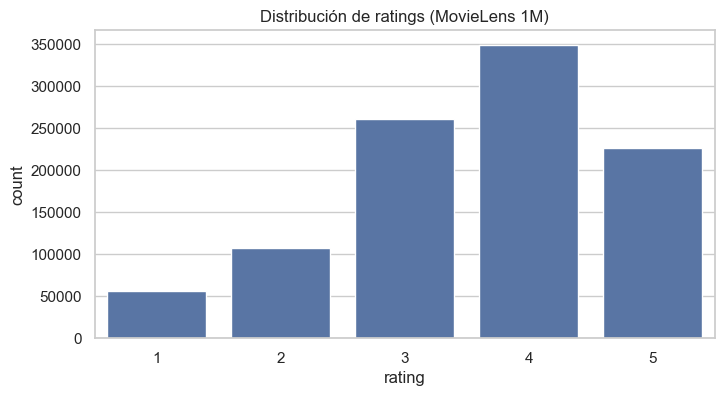

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='rating', data=ratings, order=sorted(ratings['rating'].unique()))
plt.title("Distribución de ratings (MovieLens 1M)")
plt.show()

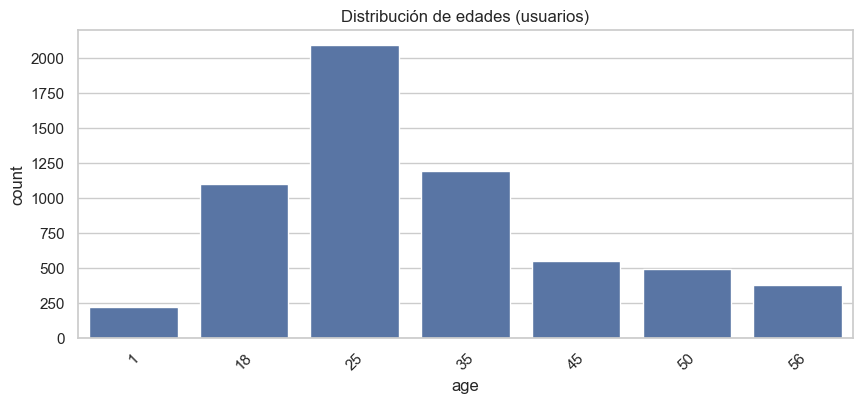

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='age', data=users, order=sorted(users['age'].unique()))
plt.title("Distribución de edades (usuarios)")
plt.xticks(rotation=45)
plt.show()

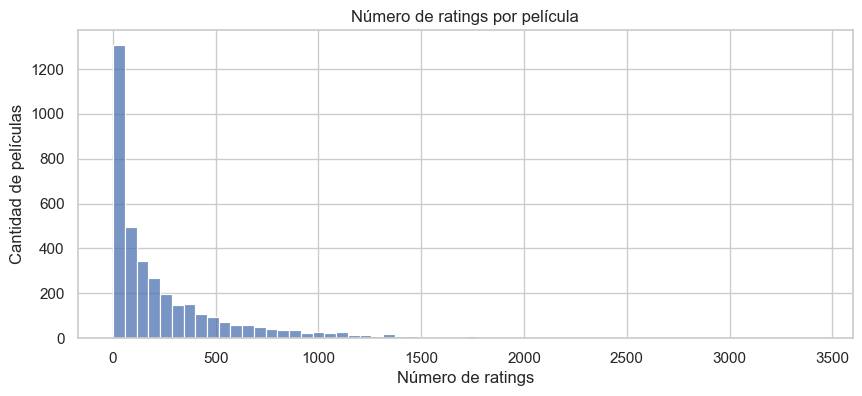

In [ ]:
ratings_per_movie = ratings.groupby('movieId').size()
plt.figure(figsize=(10,4))
sns.histplot(ratings_per_movie, bins=60, kde=False)
plt.title("Número de ratings por película")
plt.xlabel("Número de ratings")
plt.ylabel("Cantidad de películas")
plt.show()

# Matriz usuario–ítem y sparsity
Creamos la matriz pivot (opcional, puede ocupar memoria) y calculamos sparsity.

In [ ]:
# Atenuación: no hacemos pivot completo si la memoria es un problema,
# solo calculamos sparsity directamente:
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()
num_ratings = len(ratings)
sparsity = 1 - (num_ratings / (num_users * num_movies))
print(f"Usuarios: {num_users}, Películas: {num_movies}, Ratings: {num_ratings}")
print(f"Sparsity: {sparsity:.6f} ({sparsity*100:.2f}%)")

Usuarios: 6040, Películas: 3706, Ratings: 1000209
Sparsity: 0.955316 (95.53%)


# Guardado de versiones procesadas en CSV
Guardamos `ratings.csv`, `users.csv`, `movies.csv` en `../data/processed/`
para que los siguientes notebooks trabajen con esos ficheros.

In [ ]:
processed_path = raw_path / "processed"
processed_path.mkdir(exist_ok=True)

# Guardar CSV (index False)
ratings.to_csv(processed_path / "ratings.csv", index=False)
users.to_csv(processed_path / "users.csv", index=False)
movies.to_csv(processed_path / "movies.csv", index=False)

print("CSV guardados en:", processed_path.resolve())

CSV guardados en: C:\Users\angel\Desktop\Codigo TFM\data\processed


In [ ]:
# Comprobación rápida de que se han guardado y pueden leerse
test_r = pd.read_csv(processed_path / "ratings.csv", nrows=5)
test_u = pd.read_csv(processed_path / "users.csv", nrows=5)
test_m = pd.read_csv(processed_path / "movies.csv", nrows=5)
print("Lectura CSV OK. Ejemplos:")
display(test_r)
display(test_u)
display(test_m)

Lectura CSV OK. Ejemplos:


,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,userId,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,2460
4,5,M,25,20,55455


,movieId,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


# RESUMEN DEL NOTEBOOK

Hemos:
- cargado y comprobado los `.dat`
- inspeccionado distribuciones básicas de los datos
- guardado CSV procesados en `data/processed/`